In [2]:
using Plots, Measures

In [3]:
function plotline(points::Matrix{Int64}; color::Int64=1, ls=:solid)
    plot(points[:,1], points[:,2], points[:,3], color = color, ls=ls, lw=2,
    zlim=(-2,2), xlim=(-2,2), ylim=(-2,2),aspect_ratio=:equal,legend= false, showaxis = false, ticks = false,
     size = (300,300))
end
function plotline!(points::Matrix{Int64}; color::Int64=1, ls=:solid)
    plot!(points[:,1], points[:,2], points[:,3], color = color, ls=ls, lw=2)
end

plotline! (generic function with 1 method)

In [4]:
function background()
points = [1 1 1; 1 -1 1; -1 -1 1; -1 1 1; 1 1 1]
plotline(points)
points = [1 1 -1; 1 -1 -1; -1 -1 -1]
plotline!(points)
points = [ -1 1 -1; 1 1 -1]
plotline!(points, ls=:dash)
points = [ -1 1 -1; -1 -1 -1]
plotline!(points, ls=:dash)
points = [1 1 -1; 1 1 1]
plotline!(points)
points = [1 -1 -1; 1 -1 1]
plotline!(points)
points = [-1 1 -1; -1 1 1]
plotline!(points, ls=:dash)
points = [-1 -1 -1; -1 -1 1]
plotline!(points)

points1 = [1 1 1; 1 1 -1; 1 -1 1; 1 -1 -1; -1 1 1; -1 1 -1; -1 -1 1; -1 -1 -1]
points2 = [2 0 0; 0 2 0; 0 0 2; -2 0 0; 0 -2 0; 0 0 -2]
points = vcat(points1, points2)
scatter!(points[:,1], points[:,2], points[:,3], mc=:white)
scatter!([0], [0], [0], mc=:black)
end

background (generic function with 1 method)

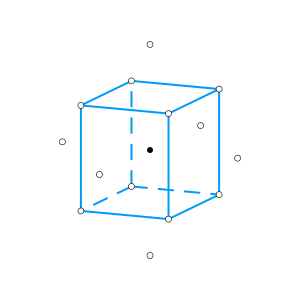

In [5]:
background()

In [6]:
using Rotations

In [7]:
body_diagonals = Array{Float64}(undef,0,3)
for x in [-1.0,1.0]
    for y in [-1.0,1.0]
        z = 1.0
        body_diagonals = vcat(body_diagonals, [x y z])
    end
end
angles = Float64[2pi/3, 4pi/3]
Rs = AngleAxis[]

for i in 1:size(body_diagonals,1)
    for j in 1:length(angles)
        R = AngleAxis(angles[j], body_diagonals[i,1], body_diagonals[i,2], body_diagonals[i,3])
        push!(Rs,R)
    end
end

In [8]:
axises = [1 0 0; 0 1 0; 0 0 1]
angles = [pi/2, pi, 3pi/2]
for i in 1:size(axises,1)
    for j in 1:length(angles)
        R = AngleAxis(angles[j], axises[i,1], axises[i,2], axises[i,3])
        push!(Rs,R)
    end
end

In [9]:
face_diagonals = [1 1 0; 1 -1 0; 1 0 1; 1 0 -1; 0 1 1; 0 1 -1]
for i in 1:size(face_diagonals,1)
    R = AngleAxis(pi, face_diagonals[i,1], face_diagonals[i,2], face_diagonals[i,3])
    push!(Rs,R)
end

In [10]:
function apply(points::Matrix{Int64}, Rs::Array{AngleAxis}) 
    theSet = Vector{Matrix{Int64}}([])
    for i in 1:length(Rs)
        newPoints = Matrix{Float64}(undef,0,3)
        for j in 1:size(points,1)
            newPoints = vcat(newPoints, (Rs[i] * points[j,:])')
        end
        push!(theSet, sortslices(round.(Int, newPoints), dims=1, by=x->(x[1],x[2],x[3])))
        push!(theSet, sortslices(round.(Int, newPoints*-1), dims=1, by=x->(x[1],x[2],x[3])))
    end
    push!(theSet, sortslices(round.(Int, points*-1), dims=1, by=x->(x[1],x[2],x[3])))
    return theSet
end

apply (generic function with 1 method)

In [11]:
const origin_points = Float64[1 1 1; 1 1 -1; 1 -1 1; 1 -1 -1; -1 1 1; -1 1 -1; -1 -1 1; -1 -1 -1;
2 0 0; 0 2 0; 0 0 2; -2 0 0; 0 -2 0; 0 0 -2]
function all_combinations()
    points_set = Vector{Matrix{Float64}}([])
    points = Matrix{Float64}(undef,0,3)
    generate_points(points_set, points,1)
    points_set
end

all_combinations (generic function with 1 method)

In [12]:
function generate_points(points_set::Vector{Matrix{Float64}}, points::Matrix{Float64}, n::Int64)
    if n > 14
        push!(points_set, points)
        return
    else
        generate_points(points_set, points, n+1)
        point = Matrix{Float64}(undef,1,3)
        point[1,:] = origin_points[n,:]
        generate_points(points_set, vcat(points, point), n+1)
    end
end

generate_points (generic function with 1 method)

In [13]:

points_set = Vector{Matrix{Int64}}([])
float_points_set = all_combinations()
for i in 1:length(float_points_set)
    push!(points_set, sortslices(round.(Int, float_points_set[i]), dims=1, by=x->(x[1],x[2],x[3])))
end

In [14]:
i = 1
while true
    if i > length(points_set)
        break
    end
    points = points_set[i]
    applied_set = apply(points, Rs) 
    for j in 1:length(applied_set)
        k = i+1
        while true
            if k > length(points_set)
                break
            end
            if points_set[k] == applied_set[j]
                deleteat!(points_set, k)
                continue
            else
                k += 1
            end
        end
    end
    i = i + 1
    if i % 100 == 0
        println(i,": ",length(points_set))
        flush(stdout)
    end
end

100: 13939


200: 11367


300: 7603


400: 4319


500: 1655


In [15]:
length(points_set)

554

In [16]:
function plot_points(points::Matrix{Int64})
    background()
    scatter!(points[:,1], points[:,2], points[:,3])
end

plot_points (generic function with 1 method)

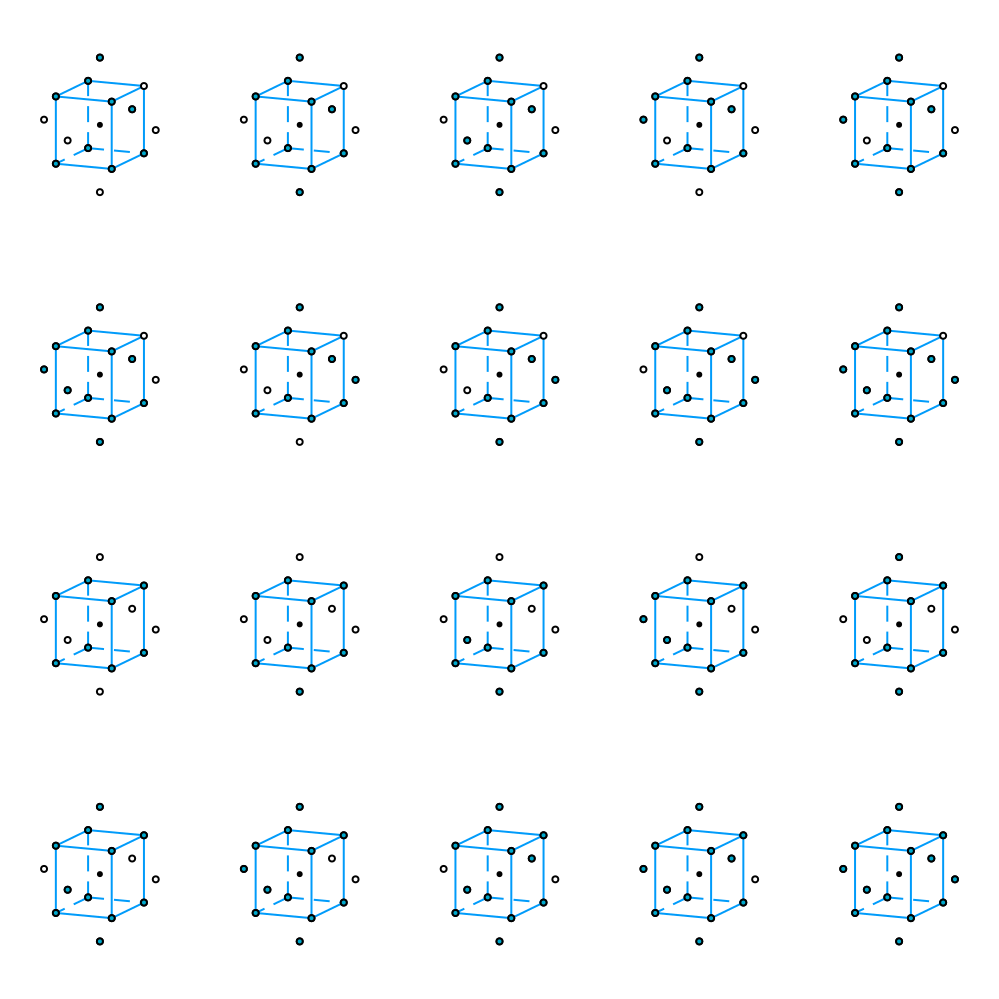

In [17]:
ps = []
for points in points_set[end-19:end]
    p = plot_points(points)
    push!(ps, p)
end
#push!(ps, plot())
plot(ps..., layout= (4,5),size=(1000,1000))

#### Neighbor condition analysis

In [24]:
NEIGHBOR_VECTORS = ([Int32[2,0,0], 
                     Int32[-2,0,0], 
                     Int32[0,2,0], 
                     Int32[0,-2,0], 
                     Int32[0,0,2], 
                     Int32[0,0,-2],
                     Int32[1,1,1], 
                     Int32[1,1,-1], 
                     Int32[1,-1,1], 
                     Int32[1,-1,-1],
                     Int32[-1,1,1], 
                     Int32[-1,1,-1], 
                     Int32[-1,-1,1],     
                     Int32[-1,-1,-1]])

14-element Vector{Vector{Int32}}:
 [2, 0, 0]
 [-2, 0, 0]
 [0, 2, 0]
 [0, -2, 0]
 [0, 0, 2]
 [0, 0, -2]
 [1, 1, 1]
 [1, 1, -1]
 [1, -1, 1]
 [1, -1, -1]
 [-1, 1, 1]
 [-1, 1, -1]
 [-1, -1, 1]
 [-1, -1, -1]

In [25]:
NEIGHBOR_DIR = Dict([Int32[2,0,0]=>2^0, 
                     Int32[-2,0,0]=>2^1, 
                     Int32[0,2,0]=>2^2, 
                     Int32[0,-2,0]=>2^3, 
                     Int32[0,0,2]=>2^4, 
                     Int32[0,0,-2]=>2^5,
                     Int32[1,1,1]=>2^6, 
                     Int32[1,1,-1]=>2^7, 
                     Int32[1,-1,1]=>2^8, 
                     Int32[1,-1,-1]=>2^9,
                     Int32[-1,1,1]=>2^10, 
                     Int32[-1,1,-1]=>2^11, 
                     Int32[-1,-1,1]=>2^12,     
                     Int32[-1,-1,-1]=>2^13])

Dict{Vector{Int32}, Int64} with 14 entries:
  [1, -1, -1]  => 512
  [-1, 1, 1]   => 1024
  [0, 0, -2]   => 32
  [-1, 1, -1]  => 2048
  [1, 1, 1]    => 64
  [0, 2, 0]    => 4
  [-1, -1, 1]  => 4096
  [1, 1, -1]   => 128
  [-2, 0, 0]   => 2
  [-1, -1, -1] => 8192
  [1, -1, 1]   => 256
  [0, -2, 0]   => 8
  [2, 0, 0]    => 1
  [0, 0, 2]    => 16

In [20]:
neighbors_set = Vector{Vector{Vector{Int32}}}()
for points in points_set
    neighbors = Vector{Vector{Int32}}()
    for i in 1:size(points,1)
        neighbor = points[i,:]
        push!(neighbors, neighbor)
    end
    push!(neighbors_set, neighbors)
end


In [22]:
struct MigrateCondition 
    index::UInt32
    paths::Vector{Vector{Int32}}
    types::Vector{UInt8}
end

In [42]:
function Paths(neighbors::Vector{Vector{Int32}})
    paths = setdiff(NEIGHBOR_VECTORS, neighbors)
    types = UInt8[]
    for path in paths
        for neighbor in neighbors
            delta = abs.(path-neighbor)
            if delta == Int32[1,1,1]
                push!(types, 1)
                @goto finish
            end
        end
        for neighbor in neighbors
            delta = abs.(path-neighbor)
            if delta == Int32[2,0,0] || delta == Int32[0,2,0] || delta == Int32[0,0,2]
                push!(types, 2)
                @goto finish
            end
        end
        push!(types,3)
        @label finish
    end
    paths, types
end

Paths (generic function with 2 methods)

In [43]:
neighbors = ([Int32[2,0,0], 
                Int32[-2,0,0]])
paths, types = Paths(neighbors)

(Vector{Int32}[[0, 2, 0], [0, -2, 0], [0, 0, 2], [0, 0, -2], [1, 1, 1], [1, 1, -1], [1, -1, 1], [1, -1, -1], [-1, 1, 1], [-1, 1, -1], [-1, -1, 1], [-1, -1, -1]], UInt8[0x03, 0x03, 0x03, 0x03, 0x01, 0x01, 0x01, 0x01, 0x01, 0x01, 0x01, 0x01])

In [ ]:
function MigrateConditionIndex(neighbors::Vector{Vector{Int32}})
    index = Int32(0)
    for neighbor in neighbors
        index += NEIGHBOR_DIR[neighbor] 
    end
    index
end

        